In [11]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn 


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from user_class import User
import numpy as np
import os
from dotenv import load_dotenv

load_dotenv()


True

In [13]:
plt.style.use('default')
sns.set_palette("husl")

In [14]:
users = User.load_from_csv('survey_data.csv')

# Convert to DataFrame
df = pd.DataFrame([user.to_dict() for user in users])

print("Data Overview:")
print(df.head())
print(f"\nTotal records: {len(df)}")

Data Overview:
   Age  Gender  Total_Income  Utilities  Entertainment  School_Fees  Shopping  \
0   30    Male        2000.0        0.0            0.0          0.0       0.0   
1   25  Female        1500.0      300.0            0.0       1000.0       0.0   
2   40  Female        3000.0      300.0            0.0        100.0       0.0   
3   26    Male        1000.0      220.0         3000.0       5000.0    1000.0   
4   50    Male        6000.0      300.0           90.0       1000.0     400.0   

   Healthcare  Total_Expenses                  Timestamp  
0         0.0             0.0 2025-09-19 12:01:16.252584  
1      3000.0          4300.0 2025-09-19 12:01:16.252774  
2         0.0           400.0 2025-09-19 12:01:16.252786  
3       300.0          9520.0 2025-09-19 12:01:16.252792  
4        20.0          1810.0 2025-09-19 12:01:16.252796  

Total records: 5


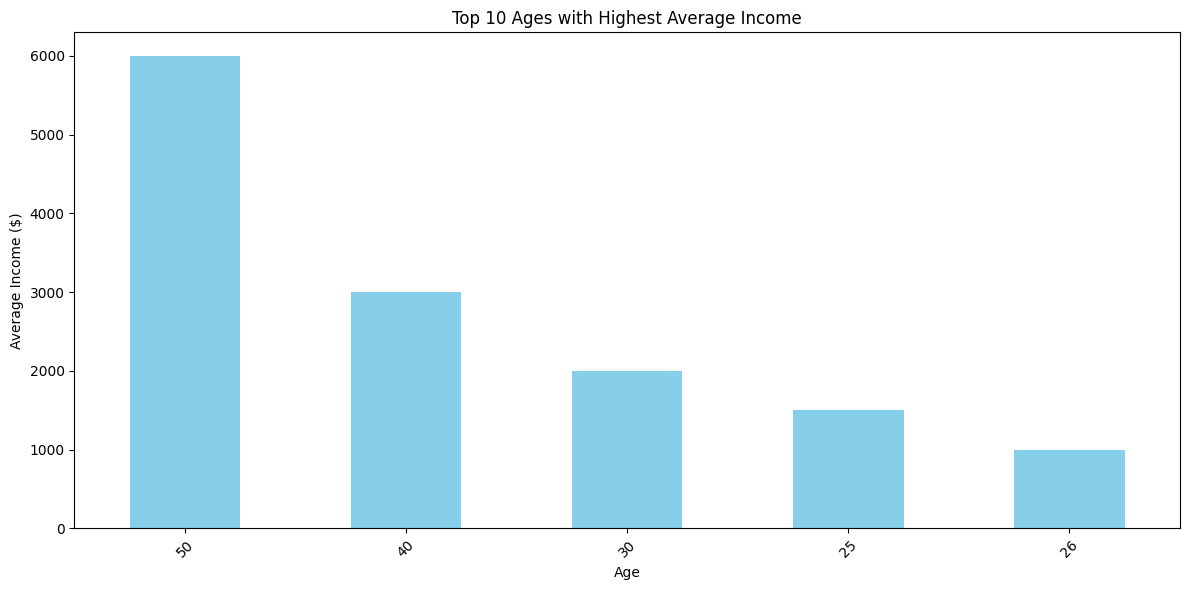

In [15]:
plt.figure(figsize=(12, 6))
age_income = df.groupby('Age')['Total_Income'].mean().sort_values(ascending=False)
age_income.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Ages with Highest Average Income')
plt.xlabel('Age')
plt.ylabel('Average Income ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('age_income_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1400x800 with 0 Axes>

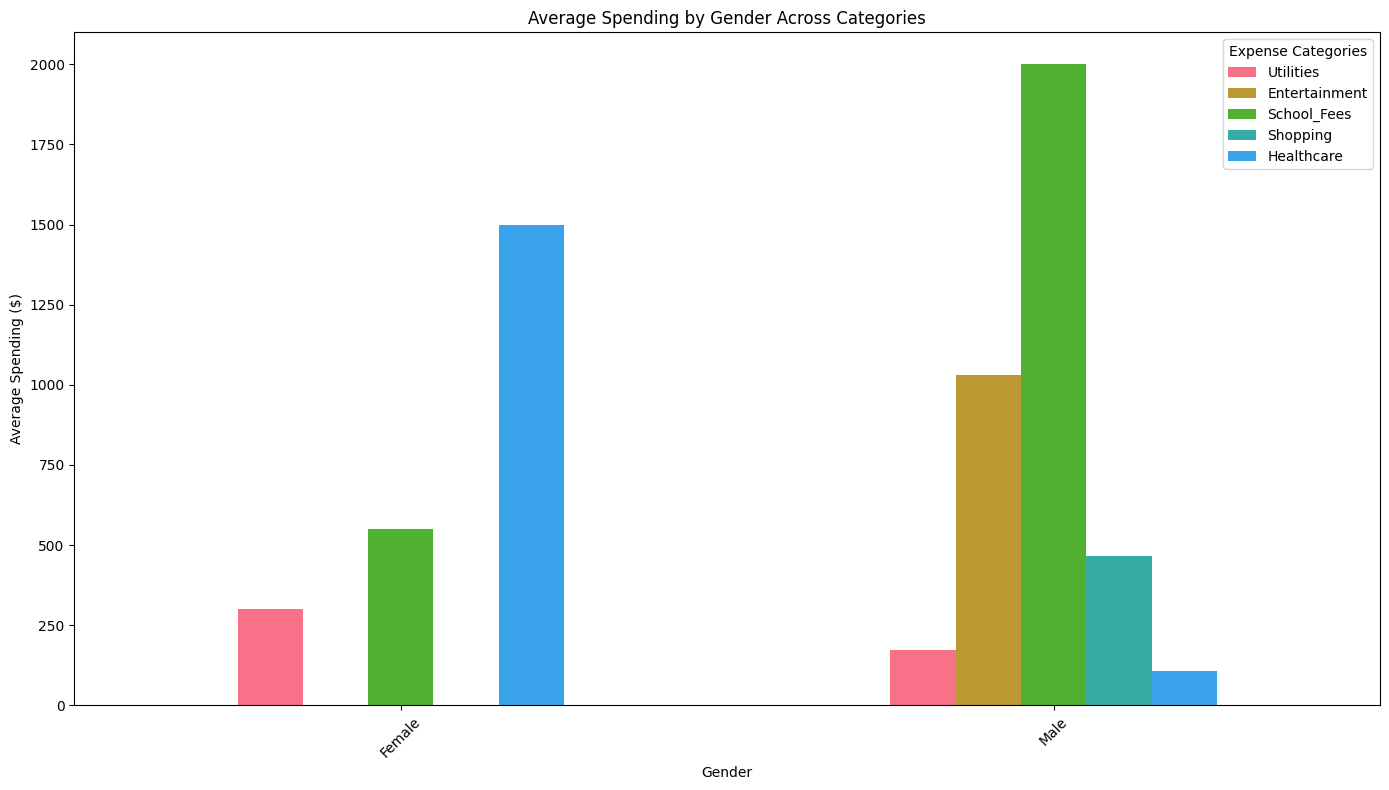

In [16]:
plt.figure(figsize=(14, 8))
expense_categories = ['Utilities', 'Entertainment', 'School_Fees', 'Shopping', 'Healthcare']

gender_spending = df.groupby('Gender')[expense_categories].mean()
gender_spending.plot(kind='bar', figsize=(14, 8))
plt.title('Average Spending by Gender Across Categories')
plt.xlabel('Gender')
plt.ylabel('Average Spending ($)')
plt.xticks(rotation=45)
plt.legend(title='Expense Categories')
plt.tight_layout()
plt.savefig('gender_spending_categories.png', dpi=300, bbox_inches='tight')
plt.show()

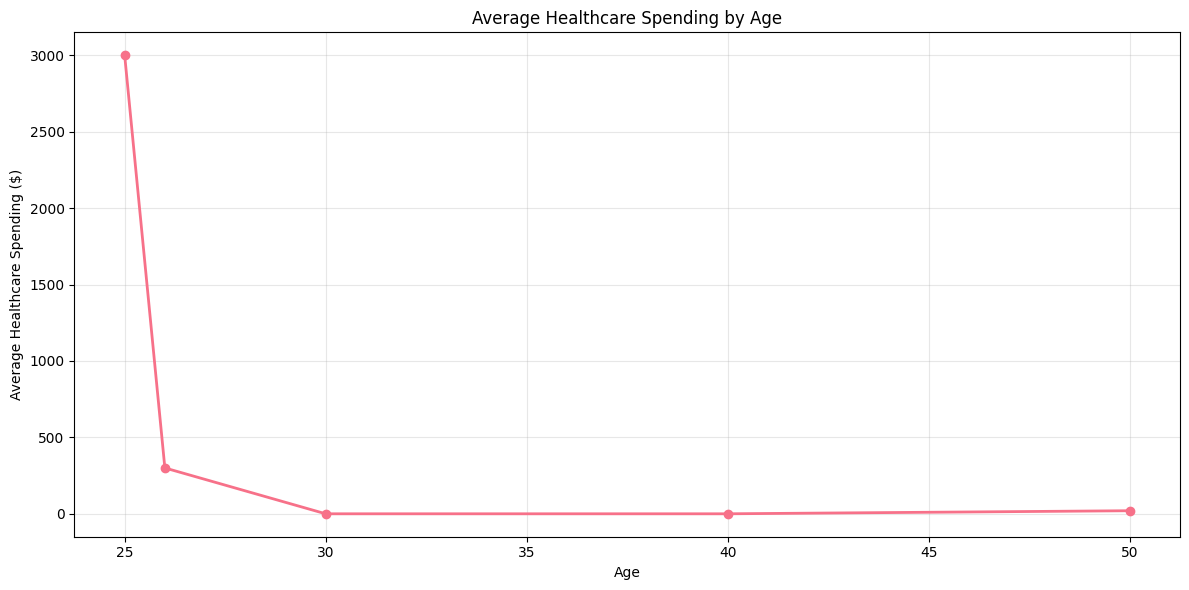

In [17]:
plt.figure(figsize=(12, 6))
healthcare_by_age = df.groupby('Age')['Healthcare'].mean()
plt.plot(healthcare_by_age.index, healthcare_by_age.values, marker='o', linewidth=2, markersize=6)
plt.title('Average Healthcare Spending by Age')
plt.xlabel('Age')
plt.ylabel('Average Healthcare Spending ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('healthcare_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

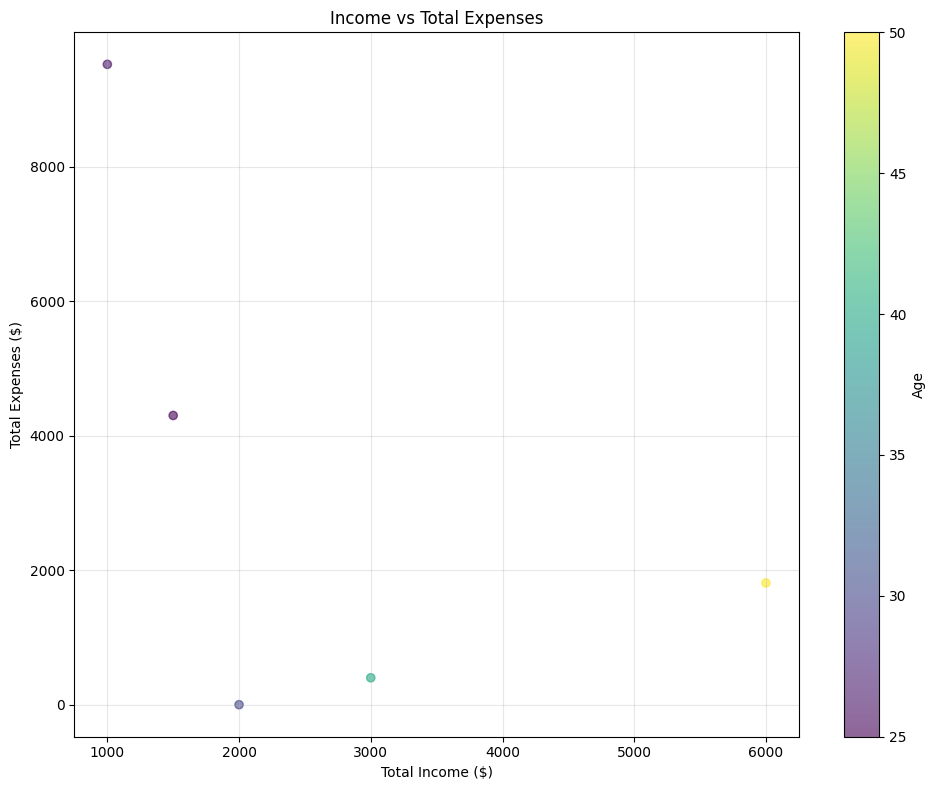

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Total_Income'], df['Total_Expenses'], alpha=0.6, c=df['Age'], cmap='viridis')
plt.colorbar(label='Age')
plt.title('Income vs Total Expenses')
plt.xlabel('Total Income ($)')
plt.ylabel('Total Expenses ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('income_vs_expenses.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
print("\nSummary Statistics:")
print(df[['Total_Income', 'Total_Expenses'] + expense_categories].describe())

print(f"\nCorrelation Matrix:")
correlation_matrix = df[['Total_Income', 'Total_Expenses'] + expense_categories].corr()
print(correlation_matrix)

# Save visualizations for PowerPoint
visualizations = [
    'age_income_distribution.png',
    'gender_distribution.png',
    'gender_spending_categories.png',
    'healthcare_by_age.png',
    'income_vs_expenses.png'
]

print(f"\nVisualizations saved for PowerPoint presentation:")
for viz in visualizations:
    print(f"- {viz}")


Summary Statistics:
       Total_Income  Total_Expenses   Utilities  Entertainment  School_Fees  \
count      5.000000        5.000000    5.000000        5.00000     5.000000   
mean    2700.000000     3206.000000  224.000000      618.00000  1420.000000   
std     1987.460691     3910.381056  129.923054     1332.14864  2057.182539   
min     1000.000000        0.000000    0.000000        0.00000     0.000000   
25%     1500.000000      400.000000  220.000000        0.00000   100.000000   
50%     2000.000000     1810.000000  300.000000        0.00000  1000.000000   
75%     3000.000000     4300.000000  300.000000       90.00000  1000.000000   
max     6000.000000     9520.000000  300.000000     3000.00000  5000.000000   

          Shopping   Healthcare  
count     5.000000     5.000000  
mean    280.000000   664.000000  
std     438.178046  1312.051828  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000    20.000000  
75%     400.000000   300.0000